# 📘 PDF Power Hacks: Everything You Didn’t Know You Could Do with R and Your PDF Files  
### 🛡️ DIY in AI: Protect your data. Don’t upload it anywhere.

# 📦 R | Compress PDF files locally without losing quality using `{magick}` 🗜️📄  

## ❓Ever had to send a PDF that was way too big? 🙃  
With R, you can reduce the file size **without sacrificing quality** — and without uploading your data online.

## 👉 Solution  
🧠 Use `{magick}` and `{pdftools}` to extract, resize, and recompress embedded images.  
🚫 No visible degradation.  
💡 Great for strict size limits like the 5MB cap common in admin portals.

## 🔧 How does it work?  
📄 Create or load a heavy PDF.  
🖼️ Render each page as an image.  
🔁 Resize, convert to JPEG, and rebuild the PDF.  
📥 Save a lighter, optimized version locally.

## 🔎 Why does it matter?  
⚖️ File size limits are common in public systems.  
📧 Send complete reports that meet those limits.  
🛡️ No online tools needed — full local processing.

## ✨ Real-world example:  
📑 Submitting a grant proposal with a 5MB file limit?  
🗜️ This approach compresses a 15MB file down to 1.9MB — no quality loss.  
🚫 No external services involved — just R.

## ⚙️ Business impact:  
📬 Faster document delivery.  
💼 Meets bureaucratic requirements painlessly.  
🛠️ Total control over your workflow and data privacy.

## 📊 Code summary  
📂 Generate synthetic high-resolution images  
🖼️ Create a large PDF from them  
🗜️ Compress pages by resizing and converting images  
📁 Export a smaller version locally  

🔗 [GitHub Repo](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main/PDF%20Power%20Hacks)

## 💭 Thought:  
What else could you automate in your document workflows with R?

🔑 #RStats #DataScience #PDFcompression #Automation #Magick #pdftools #DataPrivacy #OpenSource #TechForGood  

🔁 Found this useful? Share it with your network.  
⚠️ Don’t copy without credit — respect original work.

---

# 📘 PDF Power Hacks: Todo lo que no sabías que podías hacer con R y tus archivos PDF  
### 🛡️ DIY en IA: Protege tus datos. No los subas a ningún servidor.

# 📦 R | Comprime archivos PDF sin perder calidad con `{magick}` 🗜️📄  

## ❓¿Te ha pasado que quieres enviar un PDF pero pesa demasiado? 🙃  
Con R puedes reducir su tamaño **sin comprometer la calidad** — y sin usar herramientas online.

## 👉 Solución  
🧠 Usa `{magick}` y `{pdftools}` para extraer, redimensionar y recomprimir las imágenes internas.  
🚫 Sin pérdida visual aparente.  
💡 Ideal para cumplir con límites como los 5MB que exigen muchas plataformas públicas.

## 🔧 ¿Cómo funciona?  
📄 Crea o carga un PDF con imágenes pesadas.  
🖼️ Renderiza cada página como imagen.  
🔁 Redimensiona, convierte a JPEG y reconstruye el PDF.  
📥 Guarda una versión optimizada en tu equipo.

## 🔎 ¿Por qué es importante?  
⚖️ Muchos sistemas administrativos imponen límites de tamaño.  
📧 Puedes enviar informes completos sin preocuparte por el peso.  
🛡️ Todo se hace localmente — sin exponer tus archivos.

## ✨ Caso práctico:  
📑 Vas a presentar un proyecto y el portal exige archivos de menos de 5MB.  
🗜️ Reduces tu PDF de 15MB a 1.9MB — sin degradación.  
🚫 No usas servicios online — solo R en tu computador.

## ⚙️ Impacto en el negocio:  
📬 Entrega rápida de documentos clave.  
💼 Cumples con requisitos técnicos sin sacrificar contenido.  
🛠️ Control total de tu flujo de trabajo y privacidad.

## 📊 Resumen del código  
📂 Genera imágenes sintéticas en alta resolución  
🖼️ Arma un PDF con esas imágenes  
🗜️ Comprime redimensionando y convirtiendo imágenes  
📁 Exporta una versión liviana en tu equipo  

🔗 [Repositorio en GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main/PDF%20Power%20Hacks)

## 💭 Reflexión:  
¿Qué otra parte de tus flujos documentales automatizarías hoy con R?

🔑 #RStats #CienciaDeDatos #CompresiónPDF #Automatización #Magick #pdftools #PrivacidadDeDatos #OpenSource #TechForGood  

🔁 ¿Te ha sido útil? Compártelo con tu red.  
⚠️ Por favor, no copies sin dar crédito. Respeta el trabajo original.

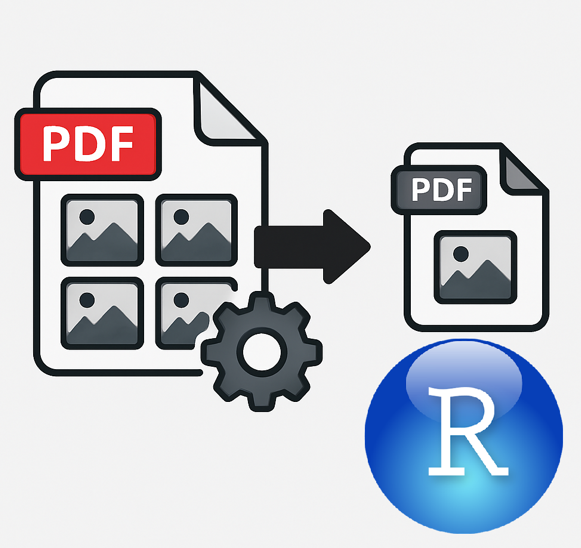


In [ ]:
library(pdftools)
library(magick)
library(fs)

# Step 1: Generate large PNG images
generate_large_images <- function(image_count = 5, width = 3000, height = 3000) {
  images <- vector("list", image_count)
  for (i in seq_len(image_count)) {
    img <- image_blank(width = width, height = height, color = sprintf("rgb(%d,%d,%d)",
                                                                     (i * 30) %% 255,
                                                                     (i * 60) %% 255,
                                                                     (i * 90) %% 255))
    images[[i]] <- img
  }
  images
}

# Step 2: Create the original PDF with PNG images (big size)
create_heavy_pdf <- function(images, output_path = "20250623_original_file.pdf") {
  tmp_pdf_files <- character(length(images))
  
  for (i in seq_along(images)) {
    # Guardar cada imagen como PDF individual (alta resolución)
    tmp_pdf_files[i] <- tempfile(fileext = ".pdf")
    image_write(images[[i]], path = tmp_pdf_files[i], format = "pdf")
  }
  
  # Combinar PDFs individuales en uno solo grande (que incluya imágenes grandes)
  pdf_combine(tmp_pdf_files, output_path)
  
  file_delete(tmp_pdf_files)
}

# Step 3: Compress the PDF by resizing images inside (approximate)
compress_pdf <- function(input_path, output_path, image_quality = 50, image_scale = 0.4) {
  n_pages <- pdf_info(input_path)$pages
  compressed_imgs <- vector("list", n_pages)
  
  for (i in seq_len(n_pages)) {
    raw_png <- pdf_render_page(input_path, page = i, dpi = 150, numeric = TRUE)
    img <- image_read(raw_png)
    
    new_width <- as.integer(image_info(img)$width * image_scale)
    new_height <- as.integer(image_info(img)$height * image_scale)
    img_resized <- image_resize(img, geometry_size_pixels(width = new_width, height = new_height))
    
    # Convertir a jpeg sin calidad, luego guardar con calidad
    img_jpeg <- image_convert(img_resized, format = "jpeg")
    
    tmp_jpeg <- tempfile(fileext = ".jpg")
    image_write(img_jpeg, path = tmp_jpeg, quality = image_quality)
    
    compressed_imgs[[i]] <- image_read(tmp_jpeg)
    file_delete(tmp_jpeg)
  }
  
  image_join(compressed_imgs) %>%
    image_write(path = output_path, format = "pdf")
}

# Ejecutar
images <- generate_large_images()
create_heavy_pdf(images, "20250623_original_file.pdf")

input_pdf <- "20250623_original_file.pdf"
output_pdf <- "20250623_compressed_file.pdf"

compress_pdf(input_pdf, output_pdf)

# Mostrar tamaño
original_size <- file_info(input_pdf)$size / (1024 * 1024)
compressed_size <- file_info(output_pdf)$size / (1024 * 1024)

cat(sprintf("Original file size: %.2f MB\n", original_size))
cat(sprintf("Compressed file size: %.2f MB\n", compressed_size))
